<a href="https://colab.research.google.com/github/adarshsingh098/EXPLORATORY-DATA-ANALYSIS-About-Home-Loan-/blob/main/HomeLoan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan_sanction_test.csv')

In [ ]:
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [ ]:
df.shape


(367, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# **DATA CLEANING & PRE-PROCESSING:**

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


<Axes: >

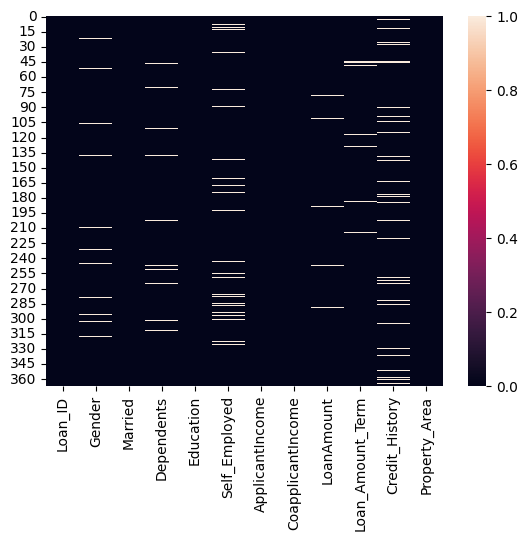

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.isnull().sum().sum()

84

 **First handeling missing value in numerical column**

Mean: Whenever your data is numeric and normally distributed, in this case you will impute missing
values with Mean.

Median: Whenever your data is numeric and skewed, in this case you will impute missing values
with Median.


In [ ]:
df_int = df.select_dtypes(include = ['int64','float64'])

Purpose: This line of code aims to create a new DataFrame called df_int that contains only the columns from the original DataFrame df which have a data type of either int64 (integer) or float64 (floating-point number)

<ipython-input-11-0e9ce7c21aec>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_int[num],bins = 20,kde_kws ={'linewidth':5,'color':'#DC143C' })


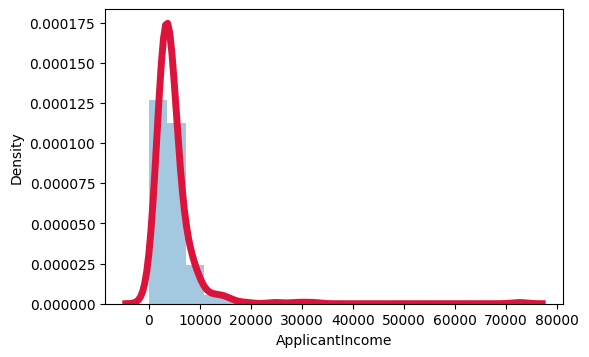

<ipython-input-11-0e9ce7c21aec>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_int[num],bins = 20,kde_kws ={'linewidth':5,'color':'#DC143C' })


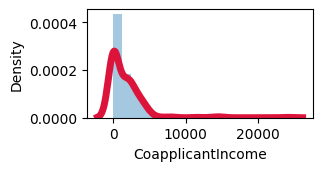

<ipython-input-11-0e9ce7c21aec>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_int[num],bins = 20,kde_kws ={'linewidth':5,'color':'#DC143C' })


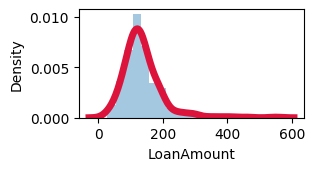

<ipython-input-11-0e9ce7c21aec>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_int[num],bins = 20,kde_kws ={'linewidth':5,'color':'#DC143C' })


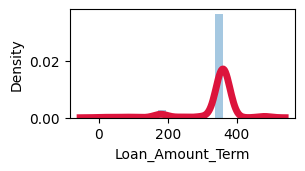

<ipython-input-11-0e9ce7c21aec>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_int[num],bins = 20,kde_kws ={'linewidth':5,'color':'#DC143C' })


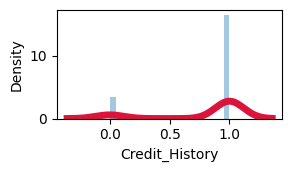

In [ ]:
plt.figure(figsize = (13,13))
for i,num in enumerate(df_int):
  plt.subplot(3,2,i+1)
  sns.distplot(df_int[num],bins = 20,kde_kws ={'linewidth':5,'color':'#DC143C' })
  plt.show()

**Purpose: The code creates a figure with multiple subplots and visualizes the distribution of each numerical feature (column) in the DataFrame df_int using distribution plots (histograms and kernel density estimations)**

In [ ]:
median_Credit_History = df['Credit_History'].median()
median_Credit_History

1.0

In [ ]:
df['Credit_History'].fillna(median_Credit_History ,inplace=True)

<ipython-input-13-4e971f4a5c6a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(median_Credit_History ,inplace=True)


In [ ]:
median_Loan_Amount_Term = df['Loan_Amount_Term'].median()
median_Loan_Amount_Term

360.0

In [ ]:
df['Loan_Amount_Term'].fillna(median_Loan_Amount_Term ,inplace=True)

<ipython-input-15-0272a8c5b760>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(median_Loan_Amount_Term ,inplace=True)


In [ ]:
median_LoanAmount = df['LoanAmount'].median()
median_LoanAmount

125.0

In [ ]:
df['LoanAmount'].fillna(median_LoanAmount ,inplace=True)

<ipython-input-17-46c98f2a72c8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(median_LoanAmount ,inplace=True)


**sconde handeling missing value in  categorical column**

You can fill the null values in the 'Dependents' and 'Self_Employed' columns with the mode:

Reasoning:

Mode: The mode is the most frequent value in a dataset. It's a suitable imputation method for categorical data, like 'Dependents' and 'Self_Employed', as it preserves the most common category.

In [ ]:
# Calculate the mode of the 'Dependents' column
dependents_mode = df['Dependents'].mode()[0]

# Fill null values in 'Dependents' with the mode
df['Dependents'].fillna(dependents_mode, inplace=True)

# Calculate the mode of the 'Self_Employed' column
self_employed_mode = df['Self_Employed'].mode()[0]

# Fill null values in 'Self_Employed' with the mode
df['Self_Employed'].fillna(self_employed_mode, inplace=True)

<ipython-input-18-3e058dcedf12>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(dependents_mode, inplace=True)
<ipython-input-18-3e058dcedf12>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

**In Gender column we will fill with " Gender are not given "**

In [ ]:
df['Gender'].fillna('Gender are not given', inplace=True)

<ipython-input-19-ca4c2f29a543>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna('Gender are not given', inplace=True)


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: >

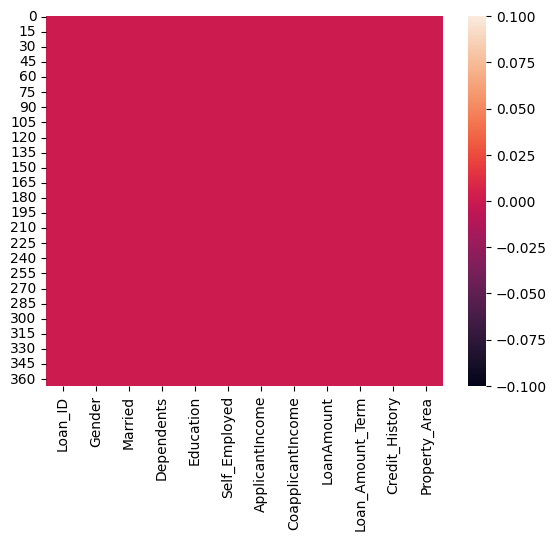

In [ ]:
sns.heatmap(df.isnull())

# **REMOVING OUTLIERS**

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

**This code snippet aims to visualize the distribution and identify potential outliers in the numerical columns of the DataFrame df using box plots.**

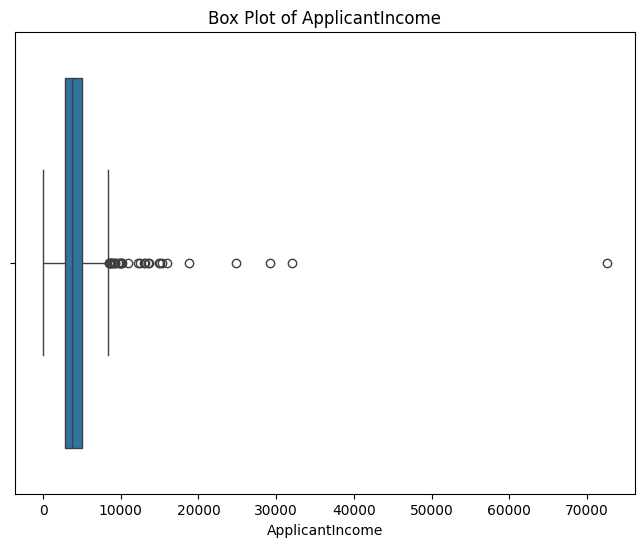

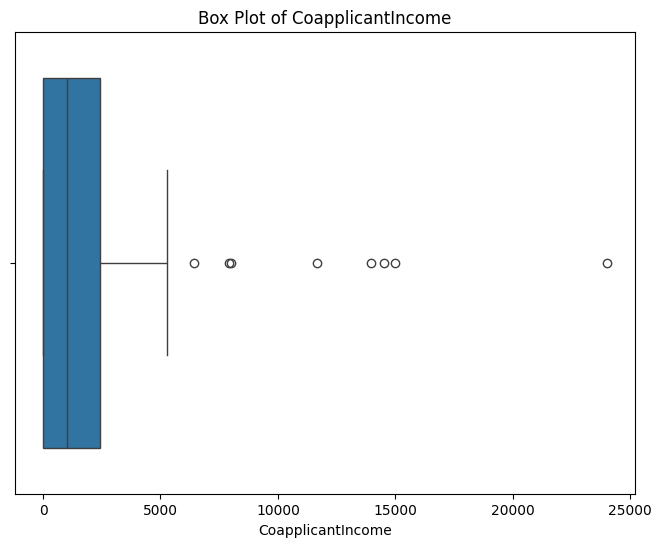

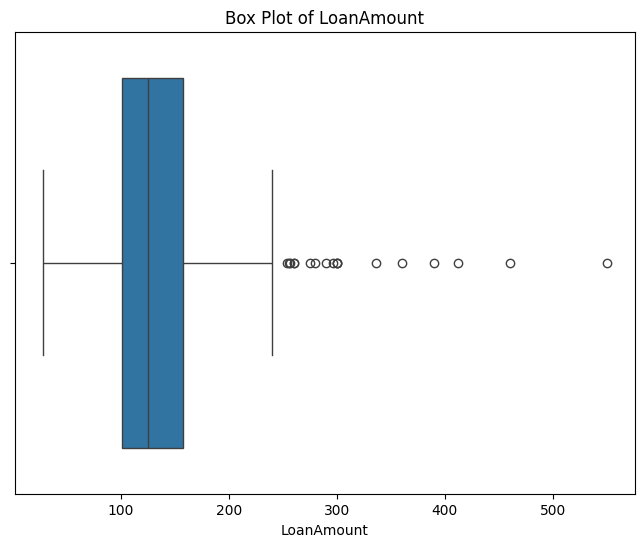

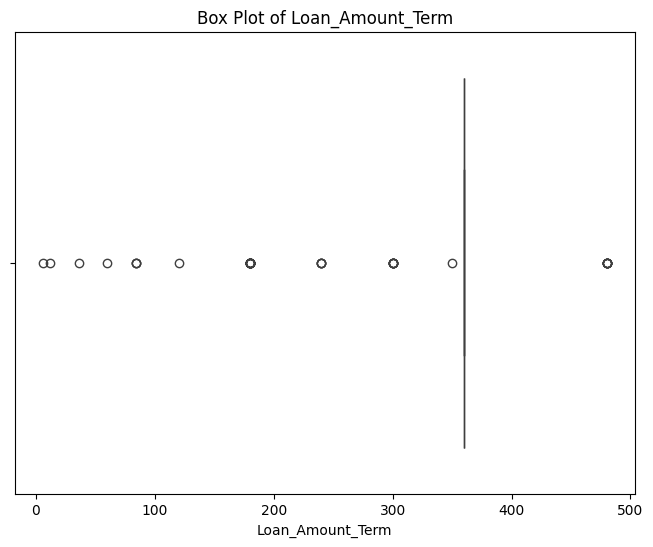

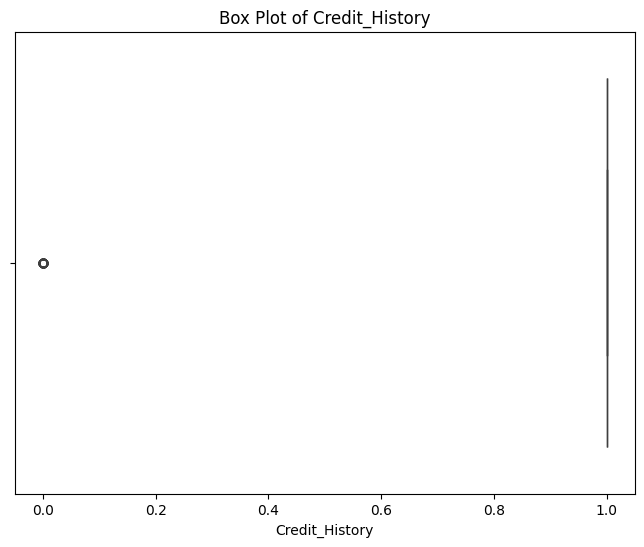

In [ ]:
for col in numerical_cols:
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
        plt.show()

In [ ]:
def remove_outliers_iqr(df, column):
    """
    Removes outliers from a DataFrame column using the IQR method.

    Args:
        df: pandas DataFrame
        column: str, name of the column to remove outliers from

    Returns:
        pandas DataFrame with outliers removed
    """
    # Calculate quantiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

**the code defines a function that uses the IQR method to identify and remove outliers from a specified column of a pandas DataFrame. It calculates the IQR, defines upper and lower bounds based on the IQR, and filters the DataFrame to keep only data points within those bounds.

**

In [ ]:
df = remove_outliers_iqr(df, 'ApplicantIncome')


In [ ]:
df = remove_outliers_iqr(df, 'LoanAmount')

In [ ]:
df = remove_outliers_iqr(df, 'Loan_Amount_Term')

In [ ]:
df = remove_outliers_iqr(df, 'Credit_History')

In [ ]:
df = remove_outliers_iqr(df, 'CoapplicantIncome')

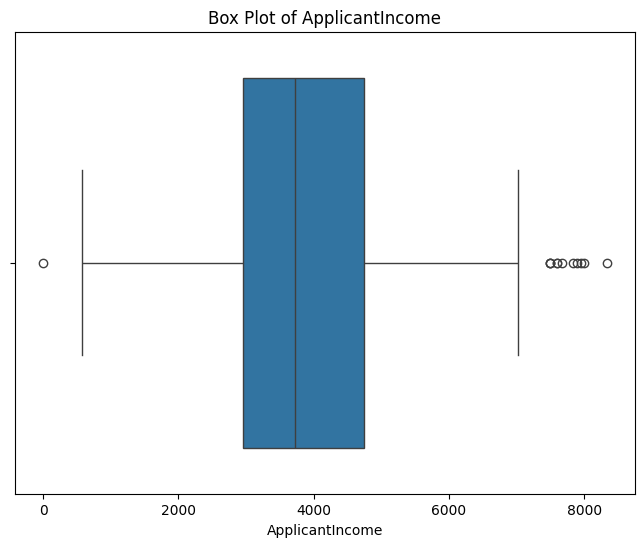

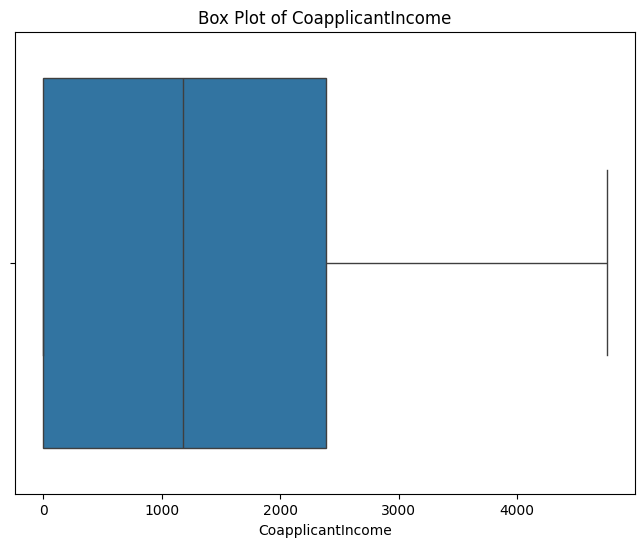

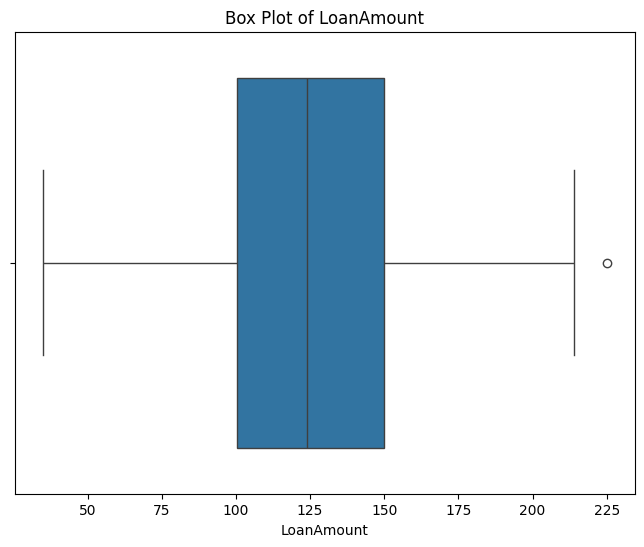

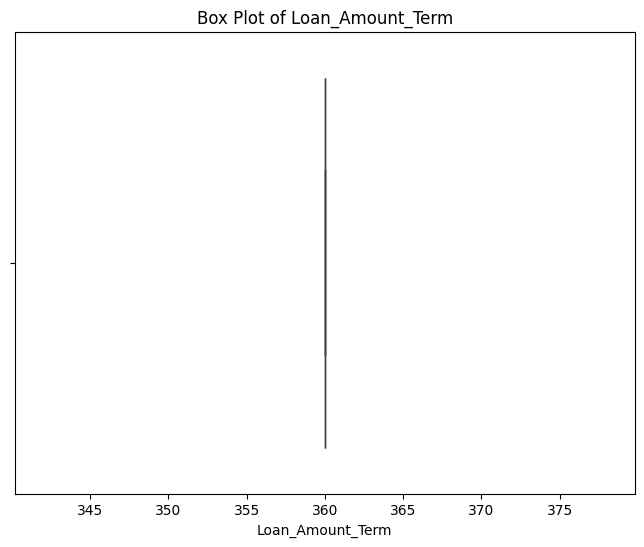

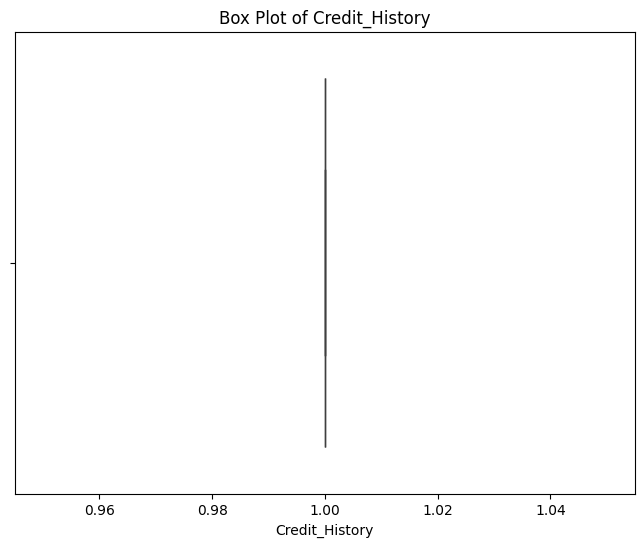

In [ ]:
for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
        plt.show()

# **Data Visualization and Insights**

#  Univariate Analysis

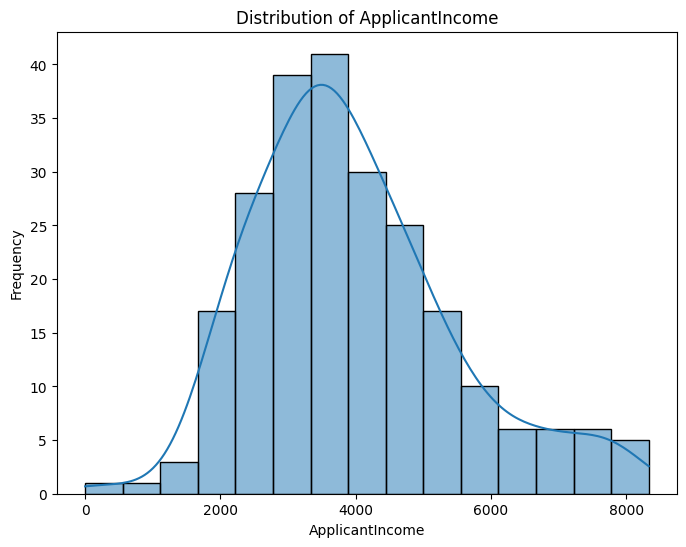

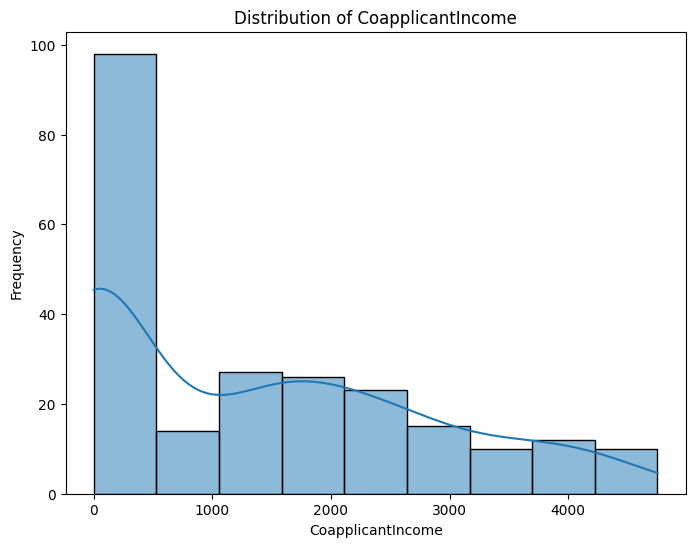

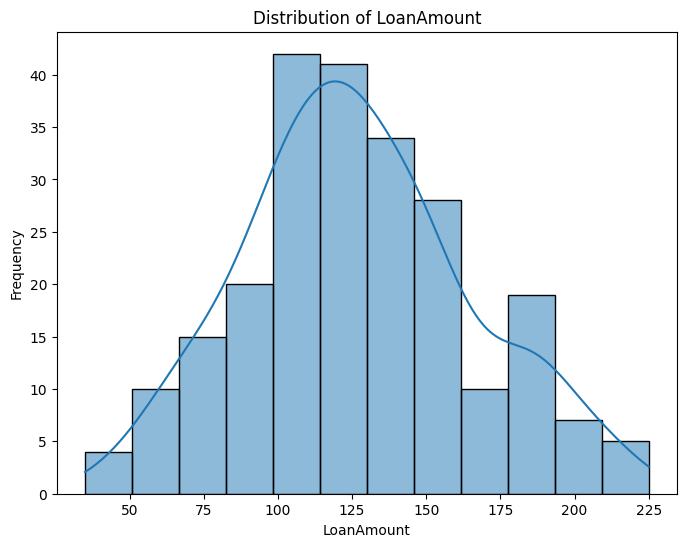

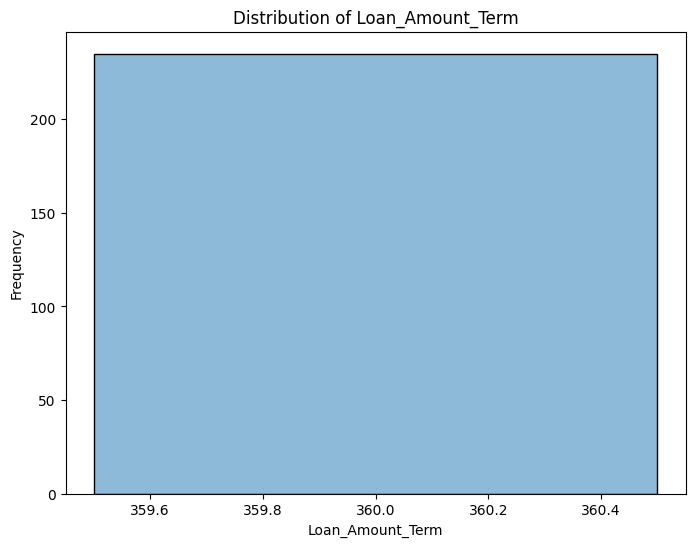

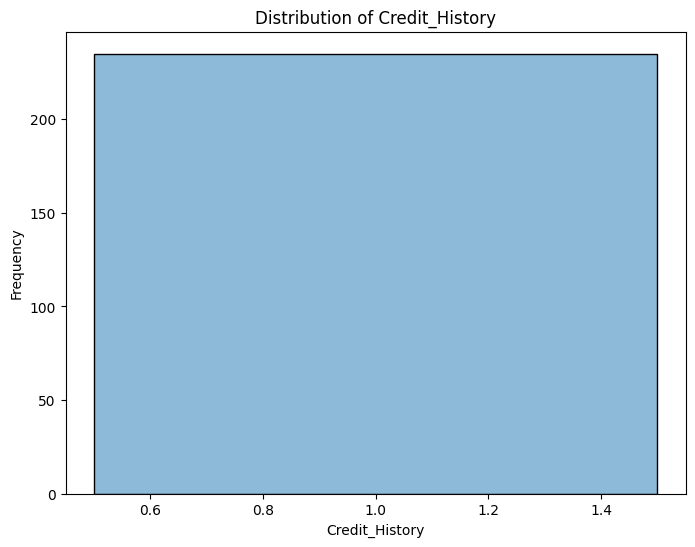

In [ ]:
#  Q1 = prompt: Histograms: Plot the frequency distribution of key numeric variables.

# Histograms for numerical variables
for column in df.select_dtypes(include=['number']):
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], kde=True)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

**histograms generated by this code, you can gain insights into the distribution of your numerical variables:

Distribution Shape: Observe whether the data is normally distributed (bell-shaped), skewed (longer tail on one side),
uniform, or has other distinct patterns. This tells you about the central tendency and spread of your data.

Central Tendency: Identify where the data is mostly concentrated (the peak of the histogram). This relates to the mean or median of the variable.
Spread/Variability: See how spread out the data is (the width of the histogram). This relates to the standard deviation or interquartile range.

Outliers: Look for any data points that are significantly far from the majority of the data. These could be potential outliers that might need further investigation or special handling.

Skewness: Observe if the distribution has a longer tail on one side, indicating skewness. This can affect the interpretation of the data and the choice of statistical methods.

Modality: Check if the distribution has multiple peaks (modes), suggesting the presence of distinct groups or clusters within the data.

By carefully analyzing the shape, center, spread, and other features of the histograms, you can gain valuable insights into the characteristics and patterns of your numerical variables. These insights are essential for data understanding, modeling, and decision-making.**

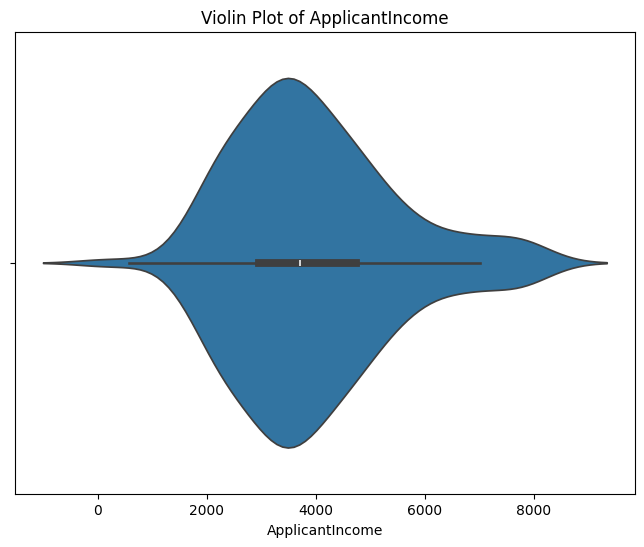

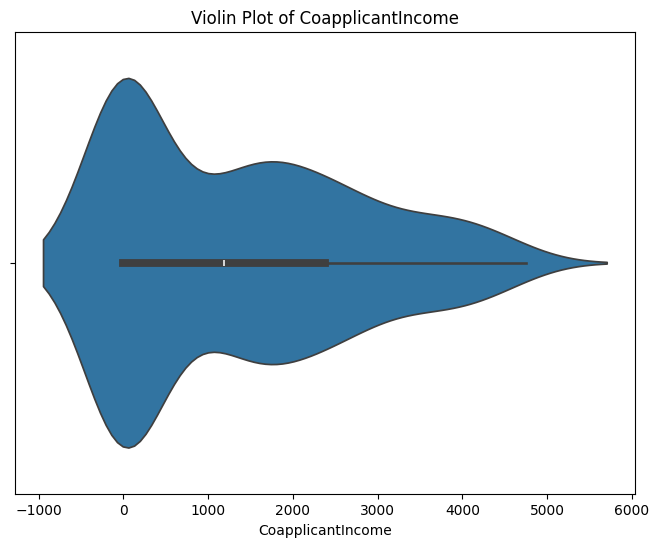

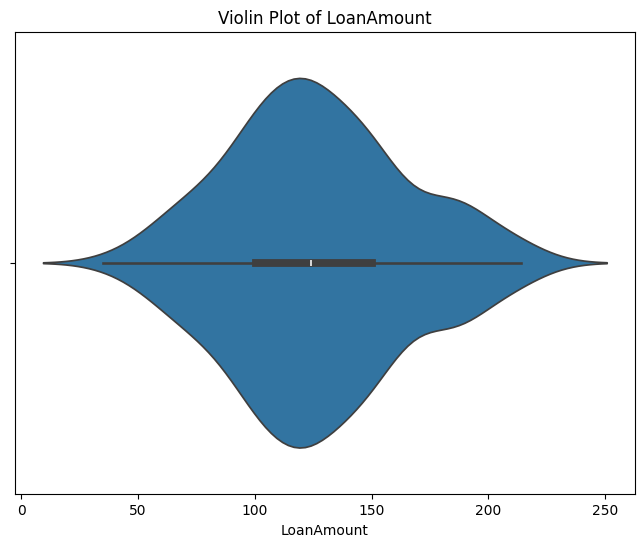

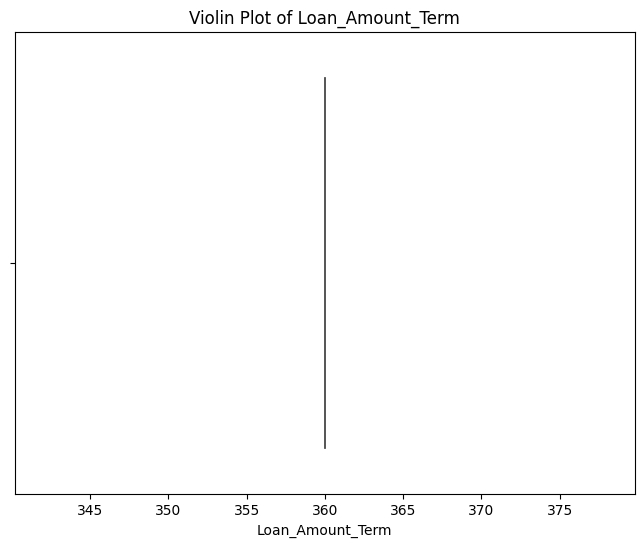

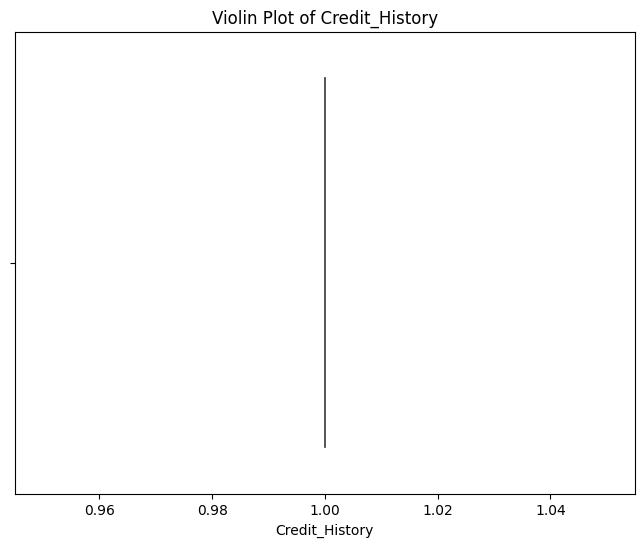

In [ ]:
# Q2  ViolinPlots: Identify potential outliers and visualize the spread of
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

for col in numerical_cols:
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  sns.violinplot(x=df[col])
  plt.title(f'Violin Plot of {col}')
  plt.show()


**Here are some key insights you can derive from the generated violin plots:

Distribution Shape: The violin plot will show whether the data in each numerical column is unimodal (one peak) or multimodal (multiple peaks). A multimodal distribution may indicate subgroups within the data.

Symmetry: You can observe whether the data is symmetrically distributed (normal distribution) or skewed. Skewness can indicate that the data might benefit from transformations (e.g., log or square root transformations).

Density: The width of the violin plot at various points shows the density of data around those values. Wider sections indicate where data points are concentrated, while narrow sections show sparsely populated areas.

Outliers: The ends of the violin plot's tails may indicate outliers. If the tails are long and thin, it could signal the presence of extreme values.

Range of Values: Like a box plot, the violin plot also gives an idea of the overall range of the data in each column, from minimum to maximum.**

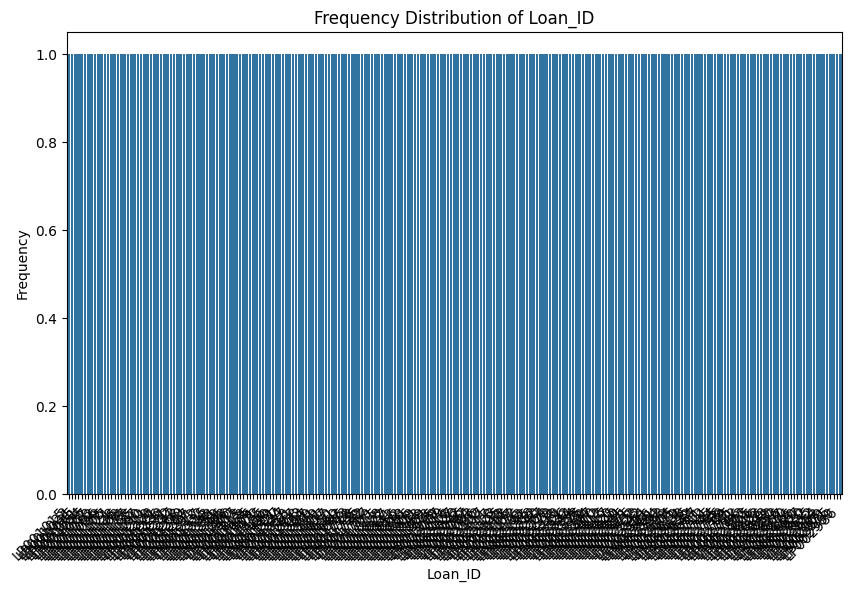

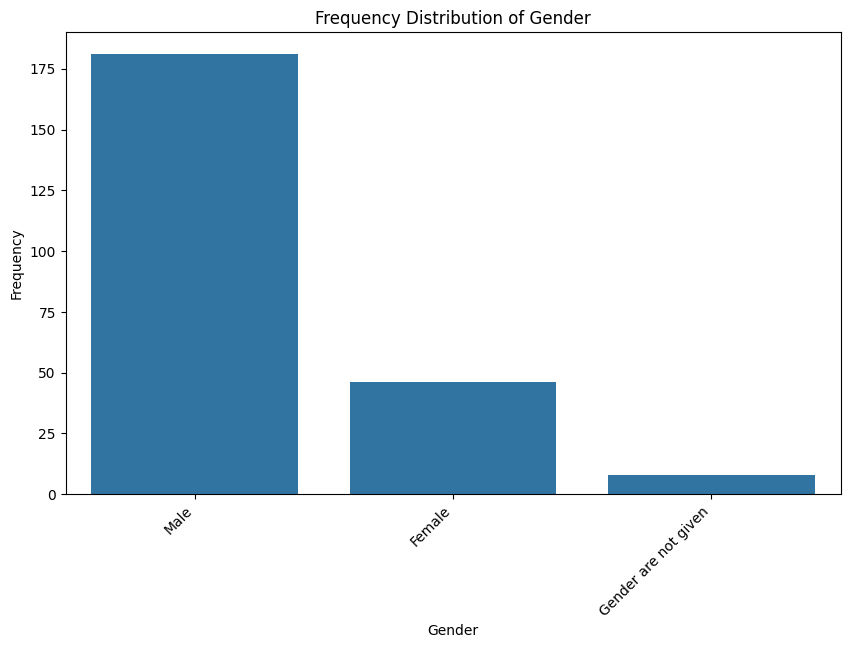

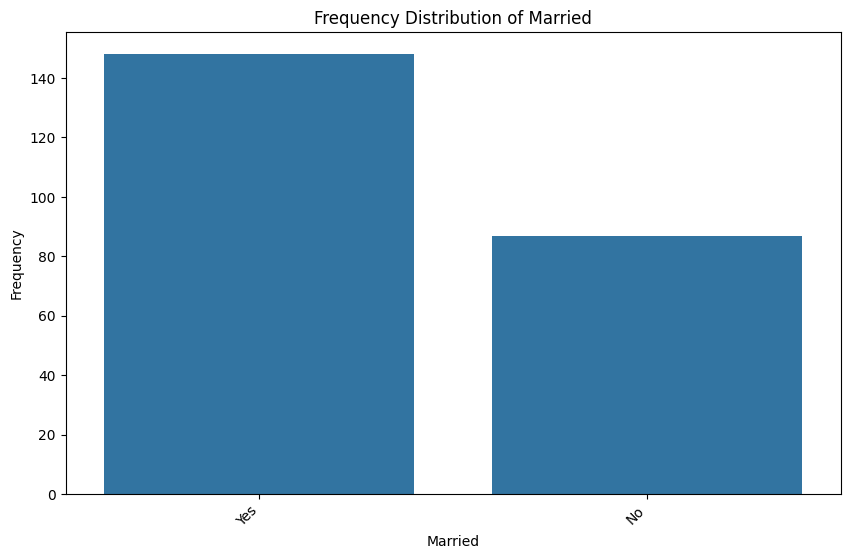

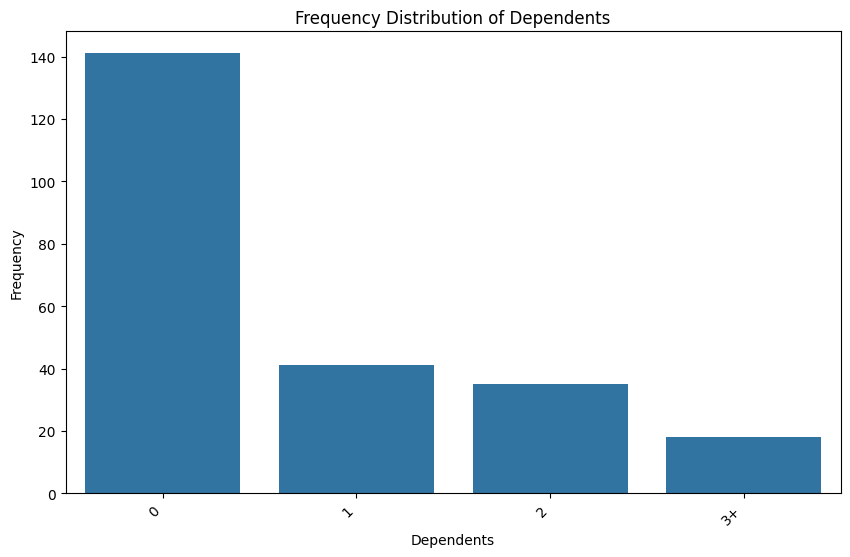

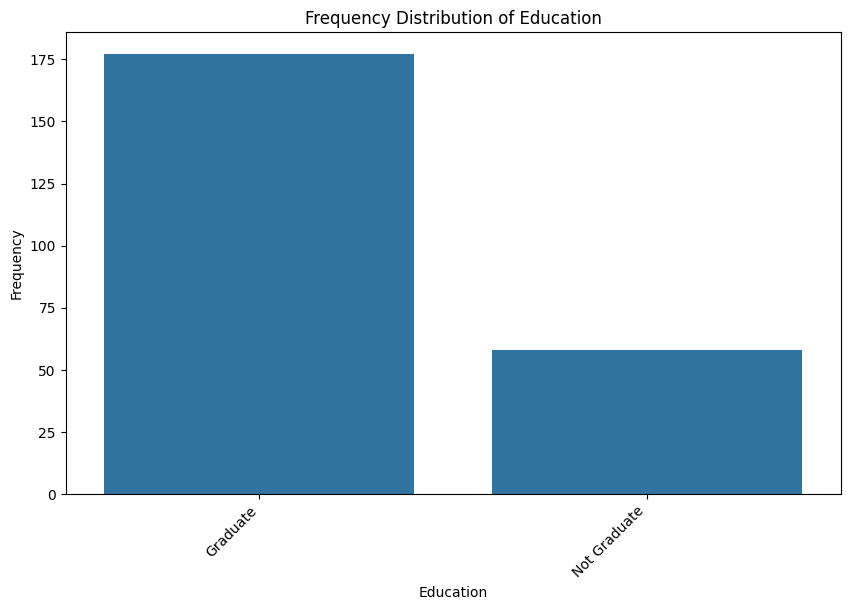

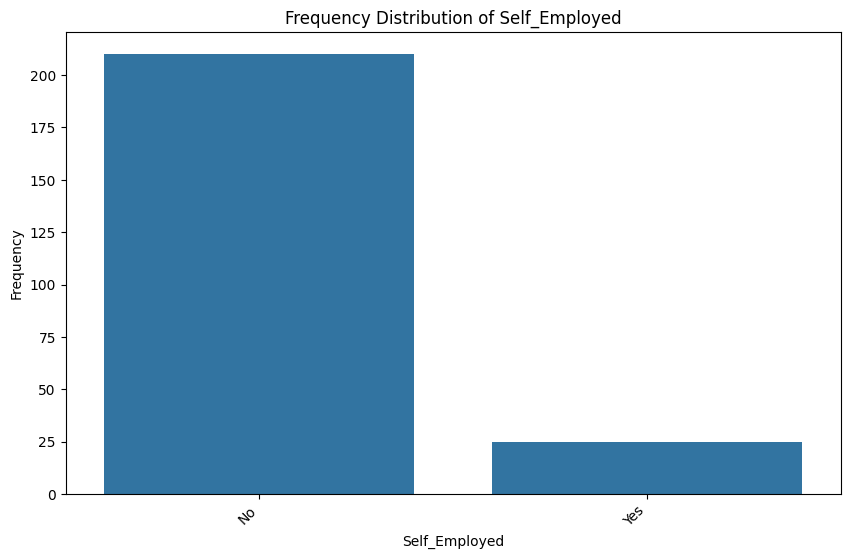

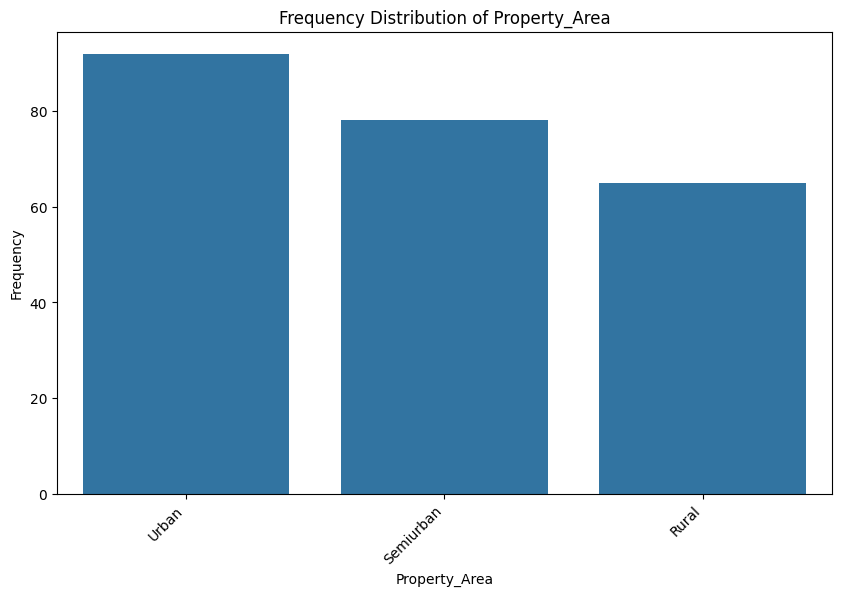

In [ ]:
 #  Q3 Bar Charts: Visualize the frequency distribution of categorical variables
 # Selecting categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Creating bar charts for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.countplot(x=df[col])
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.show()


**The code you've provided generates bar charts to visualize the frequency distribution of categorical variables in a DataFrame. Here's the key insight of the code:

Understanding Category Distribution:

The bar chart displays the frequency of each category in a given column, providing a clear picture of how many times each category appears in the dataset. This helps identify the most and least common categories in each categorical feature.
Detecting Class Imbalance:

The height of the bars shows the proportion of each category. If some categories dominate the plot, it signals class imbalance, which is crucial for tasks like classification, as an imbalanced dataset might skew model predictions.
Identifying Rare Categories:

Categories with very few occurrences are easily spotted, as they will have very short bars. Rare categories might be considered noise or merged into an "Other" category if needed.
Data Quality Insights:

The bar plot can reveal potential data quality issues, such as missing or inconsistent values (e.g., if categories are misspelled or have irregular capitalization).
Guidance for Preprocessing:

The distribution of categorical variables will help you decide on preprocessing strategies, such as whether to encode the categories (e.g., one-hot encoding, label encoding) or group less frequent categories.
The visual output provides crucial insights into the structure and quality of your categorical data, guiding further steps in analysis, data cleaning, and feature engineering.**

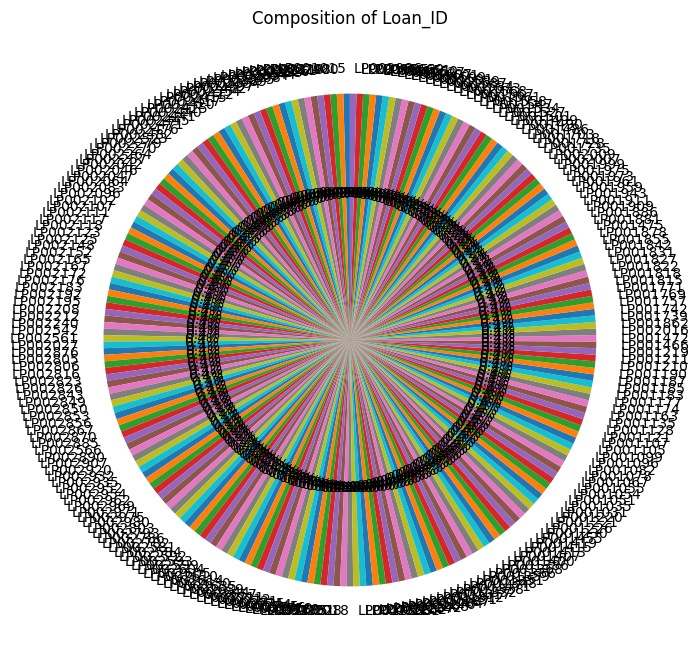

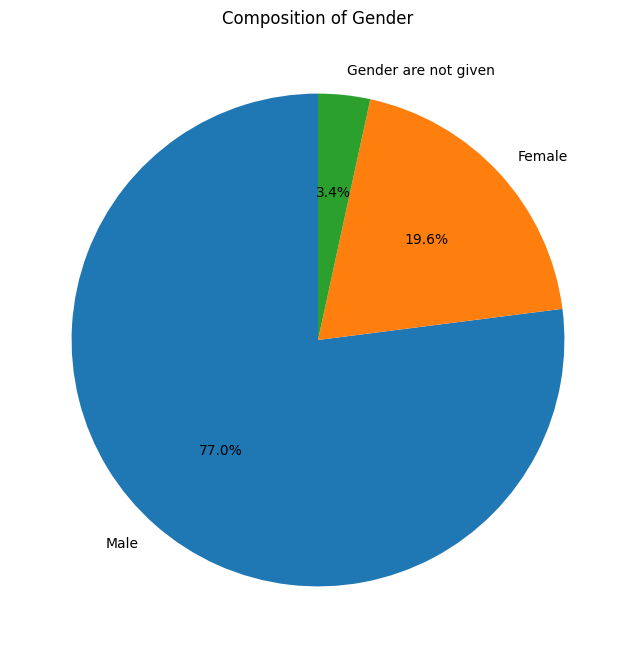

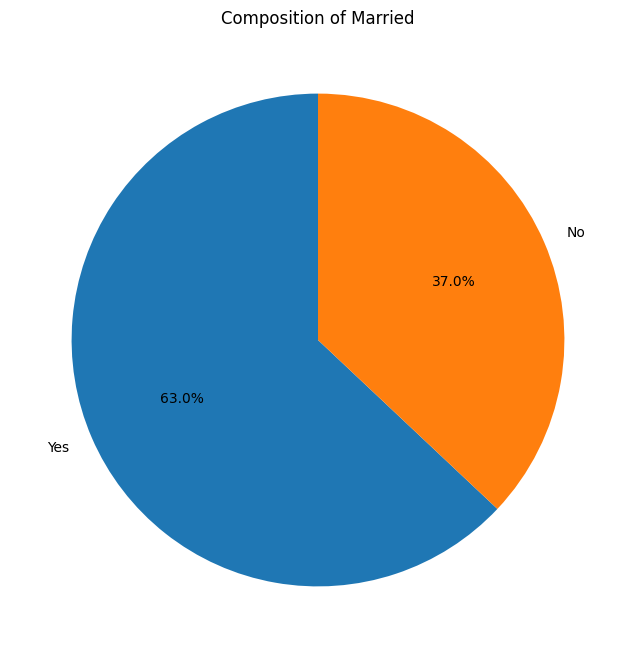

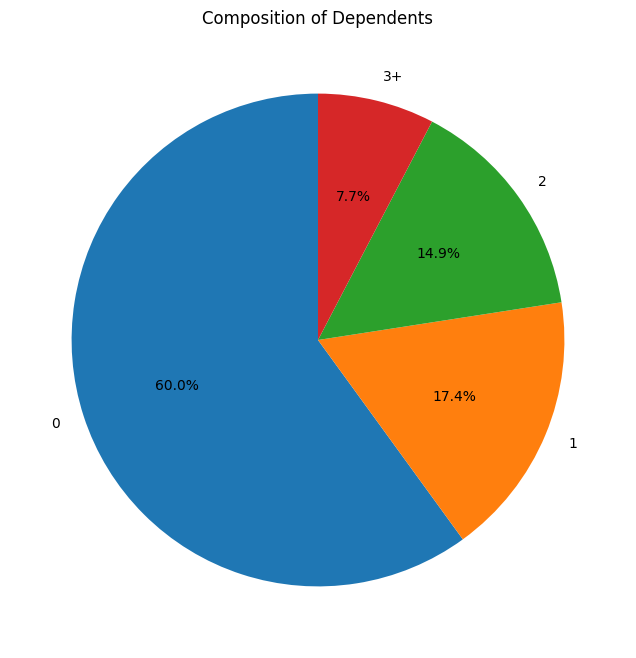

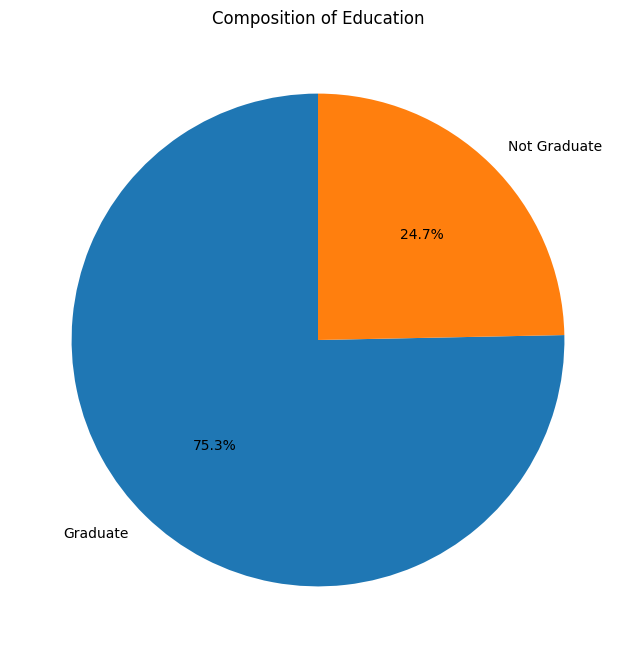

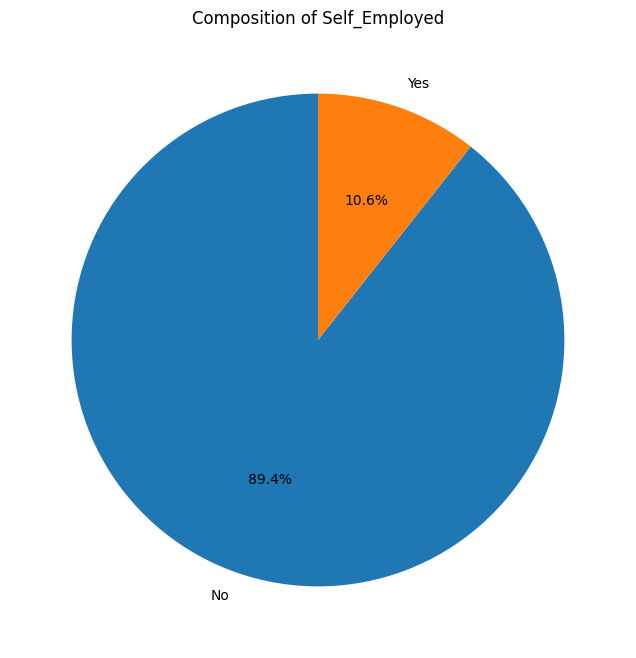

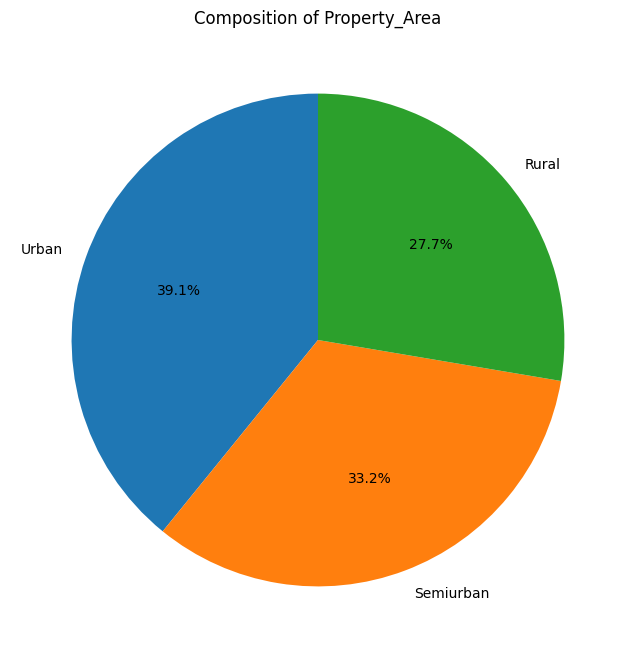

In [ ]:
 # Q4 Pie Charts: Represent the composition of categorical variables.
 # Selecting categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Creating pie charts for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(8, 8))  # Adjust figure size as needed
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Composition of {col}')
    plt.ylabel('')  # Remove y-axis label
    plt.show()


**Key Insight:

Categorical Distribution: These pie charts provide a visual representation of how each categorical variable in the dataset is distributed. You can quickly observe the proportion of different categories (e.g., classes, labels, or groups) within each column.

For instance, if one category dominates the chart, it indicates that the dataset is imbalanced for that column, which might affect model training or require resampling.

Conversely, a more balanced pie chart shows that the categories are relatively evenly distributed, which might be preferable in certain use cases (e.g., classification tasks).

This visualization helps in understanding the relative frequencies of categorical values and identifying any significant imbalances.**

#Bivariate Analysis

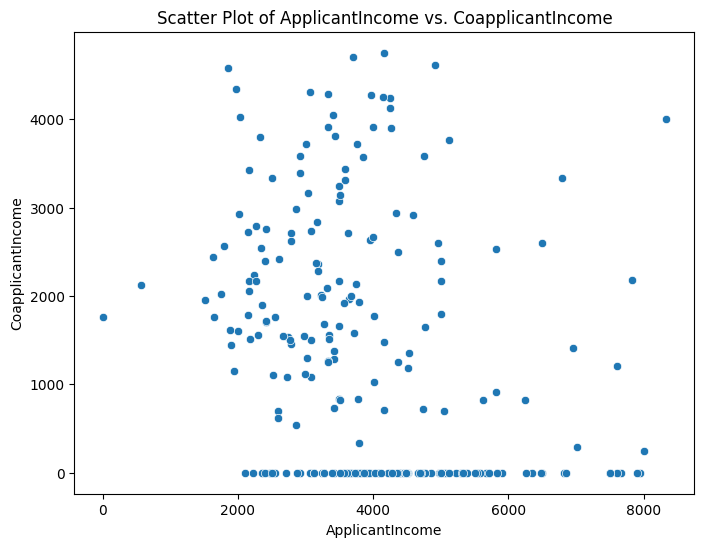

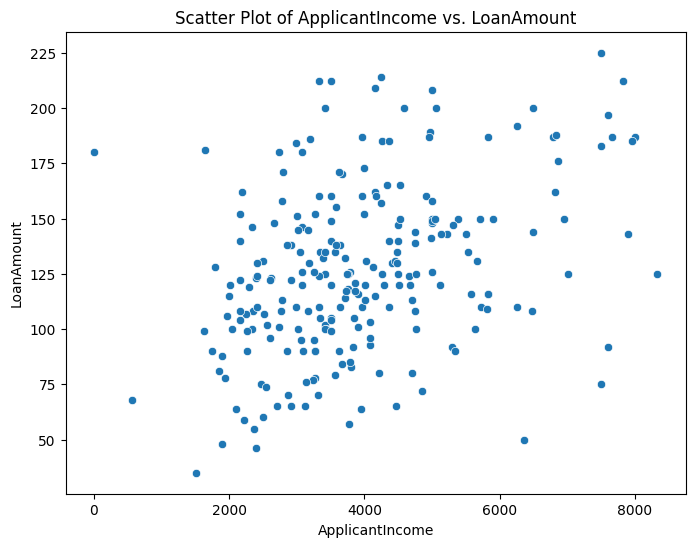

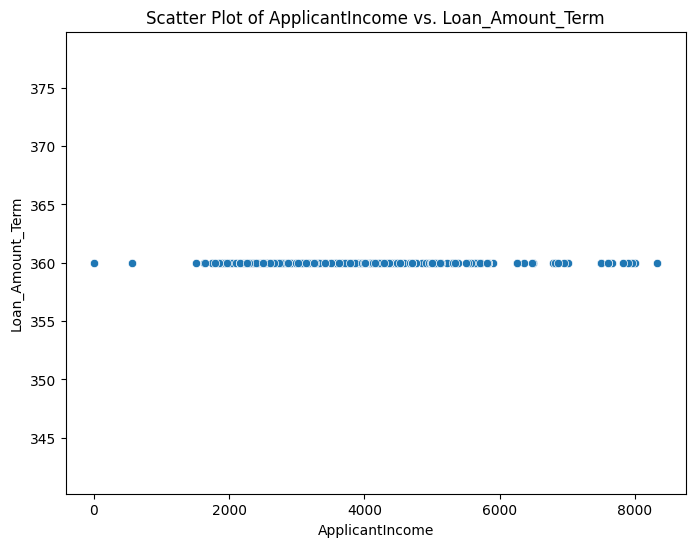

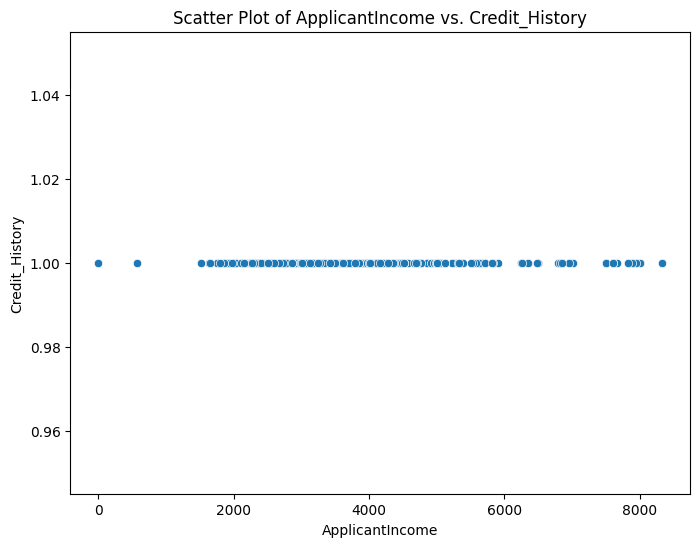

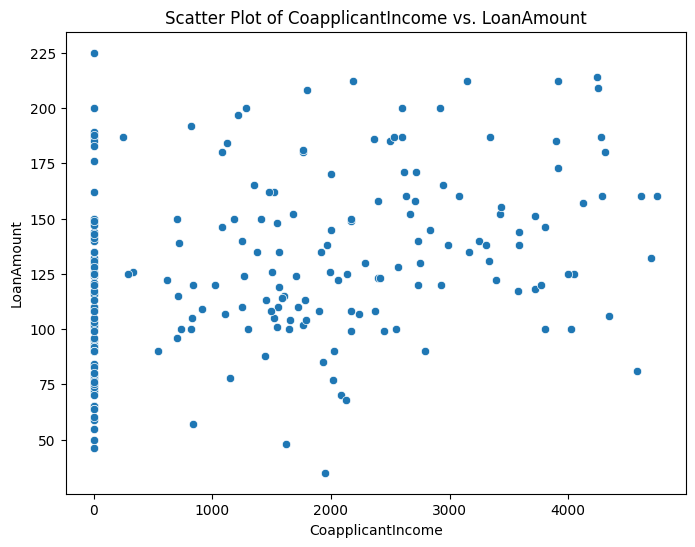

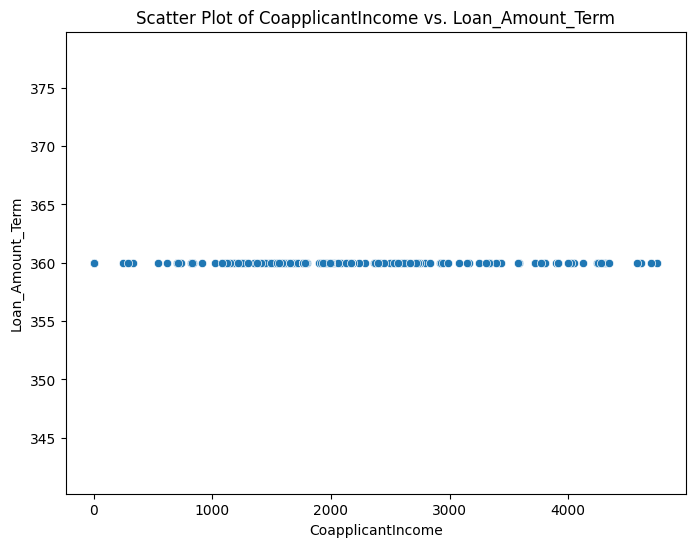

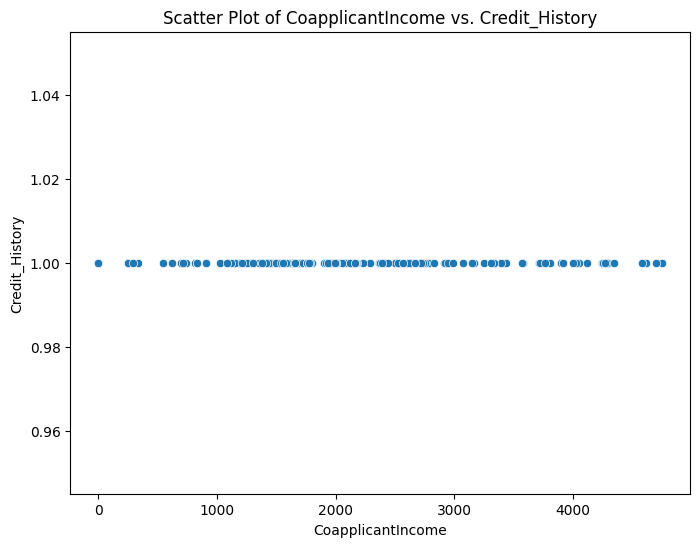

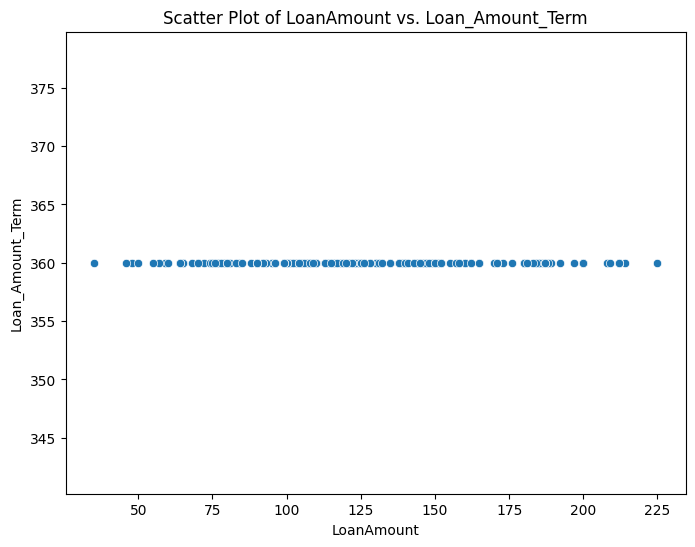

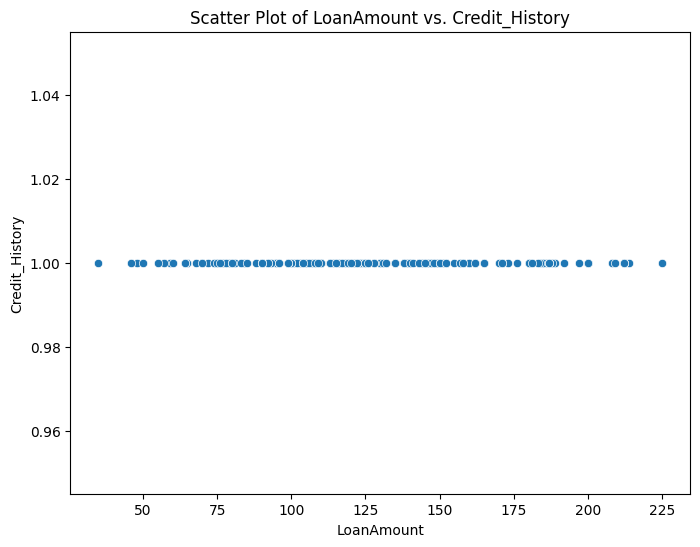

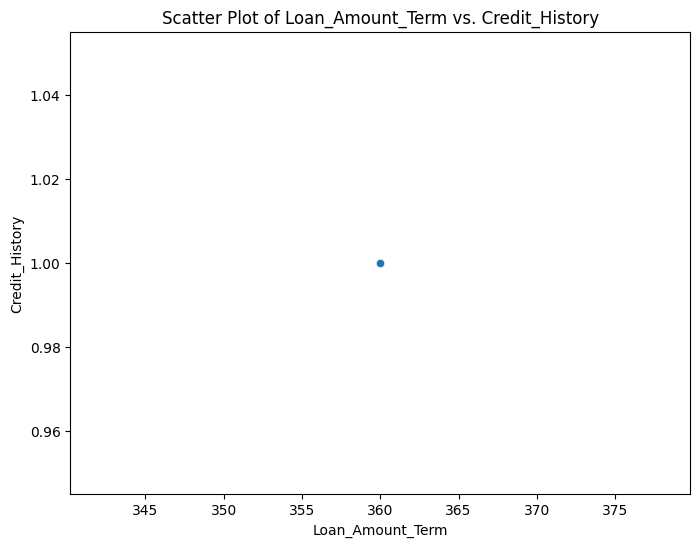

In [ ]:
# Q4 Create scatter plots to explore relationships between pairs of numeric variables.

# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Create scatter plots for all pairs of numerical columns
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        col1 = numerical_cols[i]
        col2 = numerical_cols[j]

        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        sns.scatterplot(x=df[col1], y=df[col2])
        plt.title(f'Scatter Plot of {col1} vs. {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()


Correlation: Scatter plots primarily reveal the correlation between two numerical variables.

**Positive Correlation:** If the points on the plot tend to form an upward-sloping line, it indicates a positive correlation (as one variable increases, the other tends to increase as well).
Negative Correlation: If the points form a downward-sloping line, it suggests a negative correlation (as one variable increases, the other tends to decrease).
No

**Correlation: **If the points are scattered randomly without a clear pattern, it implies little to no correlation between the variables.
Linearity: Scatter plots help you assess the linearity of the relationship between variables. If the points cluster around a straight line, it indicates a linear relationship. If the pattern is curved or non-linear, it suggests a more complex relationship.

**Outliers:** Scatter plots can highlight potential outliers – data points that deviate significantly from the general trend. Outliers might require further investigation or special handling in your analysis.

**Clusters:** Scatter plots can sometimes reveal clusters or groupings of data points, indicating the presence of distinct subgroups within your data.

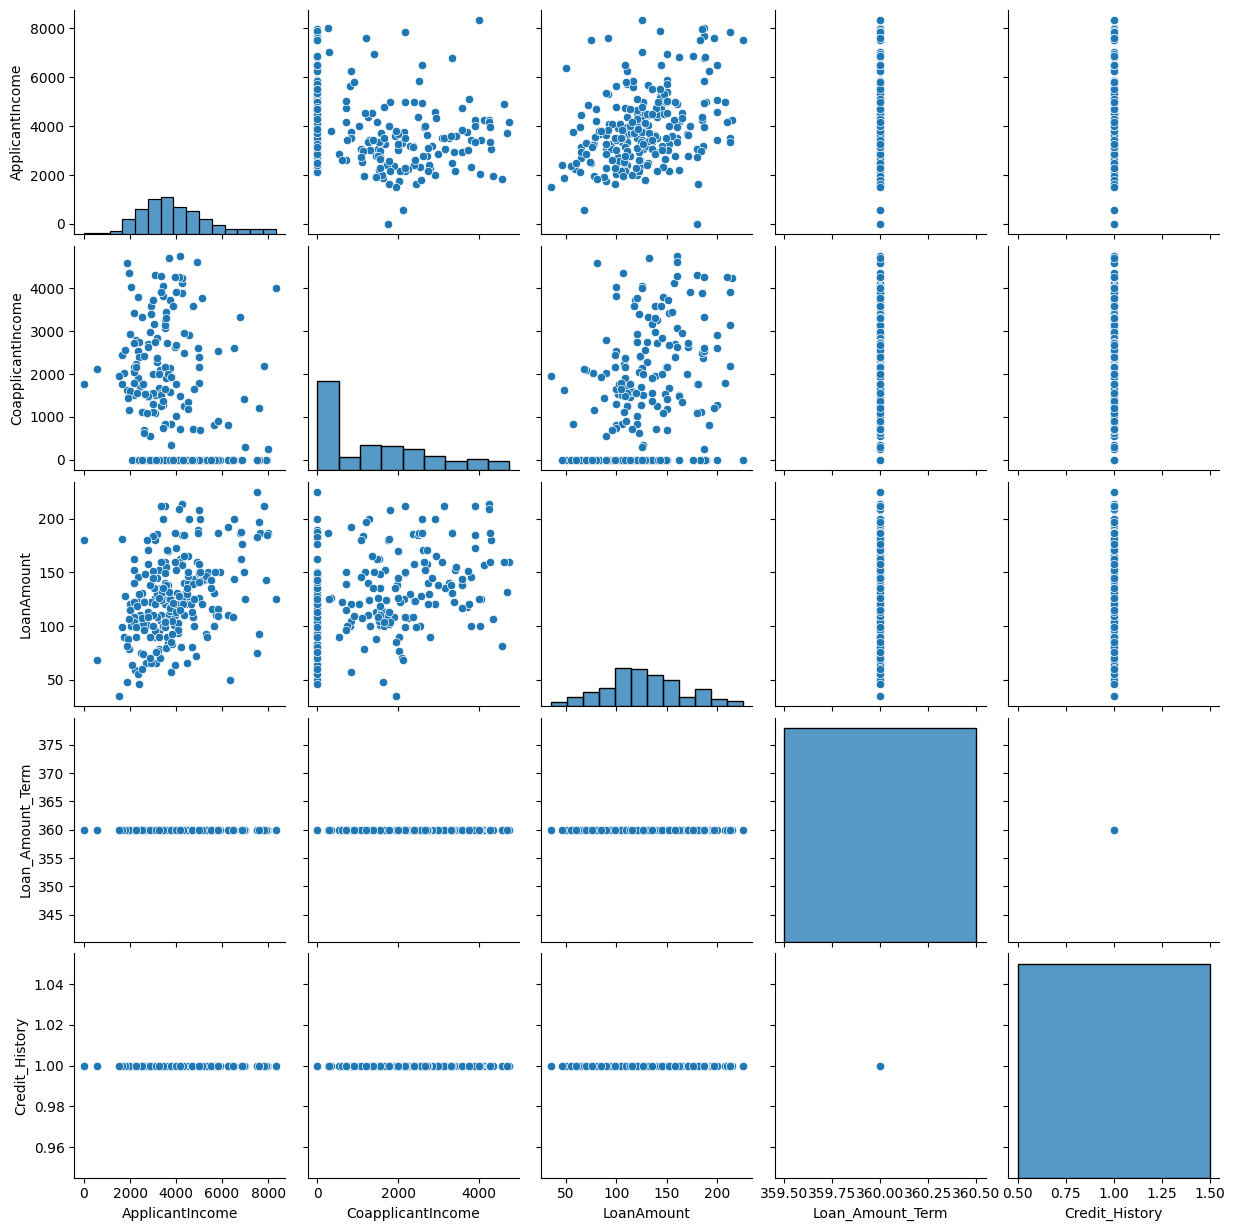

In [ ]:
# Use pair plots (scatter matrix) to visualize interactions between multiple numeric variables

numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Create the pair plot
sns.pairplot(df[numerical_features])
plt.show()

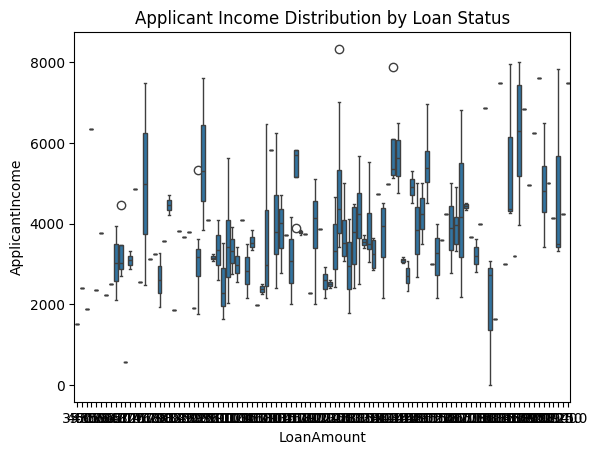

In [ ]:
#Investigate the relationship between categorical and numeric variables using box plots

sns.boxplot(x='LoanAmount', y='ApplicantIncome', data=df)
plt.title('Applicant Income Distribution by Loan Status')
plt.show()

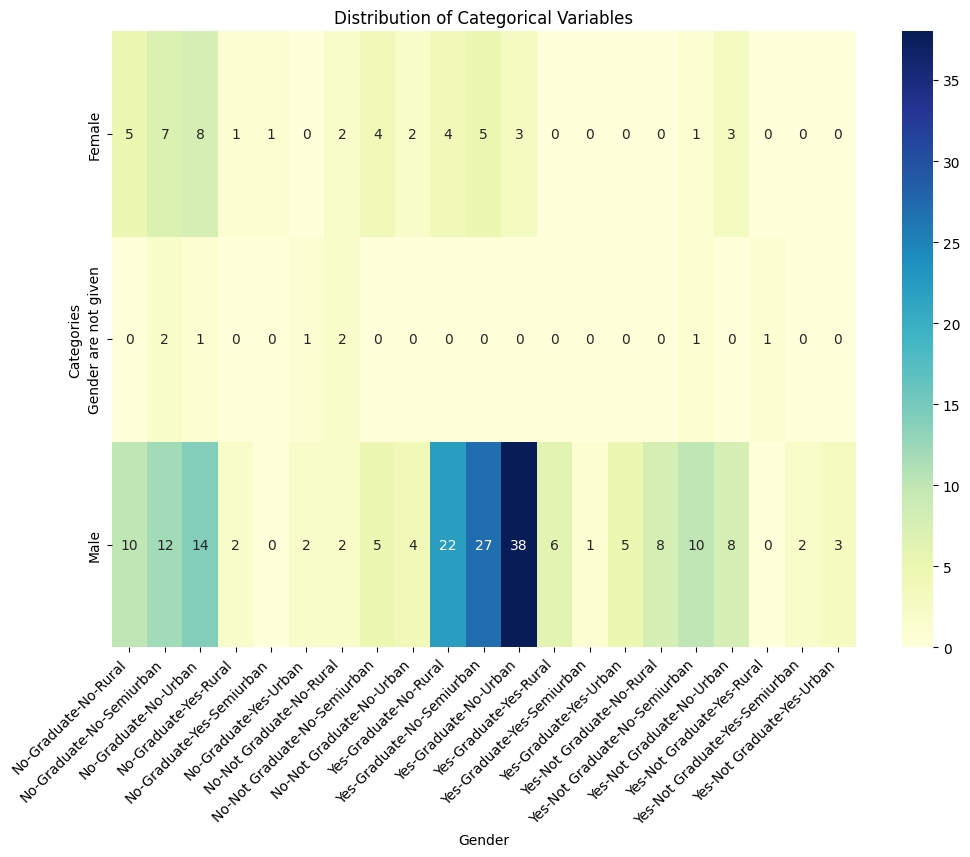

In [ ]:
#Perform a correlation analysis to identify relationships between numeric variables. Visualizeorrelations using a heatmap  Create a stacked bar chart to show the distribution of categorical  variables across multiple.
# Select the categorical columns you want to visualize
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', ]

# Create a cross-tabulation to get the counts for each category combination
cross_tab = pd.crosstab(df[categorical_cols[0]], [df[col] for col in categorical_cols[1:]])

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Distribution of Categorical Variables')
plt.xlabel(categorical_cols[0])
plt.ylabel('Categories')
plt.xticks(rotation=45, ha='right')
plt.show()